<a href="https://colab.research.google.com/github/AchrefHamdi/Data-Science/blob/main/AI_4_Isitcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part 1: Data Science**

In [ ]:
import pandas
# Data loading
# pandas 3andha barcha anwe3 ta3 read, selon type de fichier te3ik
dataset = pandas.read_csv("https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/EDA%20-%20pokedex_(Update_05.20).csv")
# lezem .csv fi e5er bech inajem ya9ra l fichier mn lien

In [ ]:
# n7ib na3ref nombres des lignes w colonnes
dataset.shape 

(1028, 51)

In [ ]:
# dataset.columns ta3tina esem les colonnes lkol
dataset.columns

In [ ]:
dataset.describe()

In [ ]:
# dataset.drop tfasakh des lignes wala des colonnes.
# lezim awil parametre ikoun liste [] ta3 les colonnes, w ta3mel axis=1 bch ya3rfou anou colonnes
# mahouch bch isir changement à moins que n9olou inplace=True wala na3mel dataset = dataset.drop()
dataset.drop(['german_name', 'japanese_name'], axis=1, inplace=True)

In [ ]:
# bch nra awil 5 lignes fil data
dataset.head()

In [ ]:
# bch nra e5er 5 lignes fil data
dataset.tail()

In [ ]:
# bch nra ligne au hasard
dataset.sample()

In [ ]:
# info() ta3tini des informations mil bara 3al data
# mil bara no9sdou nbr lignes, nbr colonnes, type
# 3ala kol colonne 9adeh min valeure nulle et type de colonne
# aussi 9adeh min type en total w 9adeh tekil en mémoire
dataset.info()

In [ ]:
# describe ta3tini des information mil dekhil il data
# 3ala kol colonne, 9adeh min valeure, moyenne, std, valeur min, valeur max et distribution
dataset.describe()

In [ ]:
# isna() ta3tini ken valeur nulle ou pas.
# isna().sum() ta3tini 3ala kol colonne 9adeh min valeur nulle
# isna().sum().sum() ta3tini fil dataset lkolha 9adeh min valeur nulle
dataset.isna().sum()

In [ ]:
# najem naccedi les valeures ta3 colonne en faisant dataframe[nom_colonne]
dataset['generation']

In [ ]:
# najem na3ref les valeurs uniques fi une colonne avec unique()
vals = dataset['generation'].unique()
# najem na3ref les valeurs unique que nunique()
nuni = dataset['generation'].nunique()
print(vals, nuni)

[1 2 3 4 5 6 7 8] 8


In [ ]:
# avaant changement
dataset.rename(columns={'generation':'gen'}, inplace=True)
# apres changement
#dataset.columns

In [ ]:
# tasna3 colonne jdida ta3mel dataset[ism_jdid] = valeur, valeur tnajem tkoun fonction
dataset["semi_densité"] = dataset['weight_kg'] / dataset['height_m']
dataset['semi_densité']
dataset.columns

In [ ]:
# ta3ml plot de colonne attack
dataset['defense'].plot()

In [ ]:
# ta3ml plot ll height 
dataset[dataset['height_m'] < 100 ]['height_m'].plot()

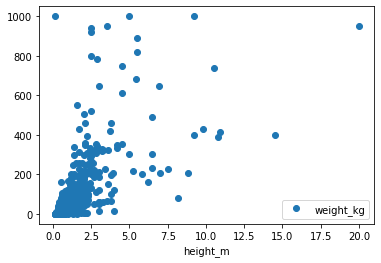

In [ ]:
# ta3ml plot ama mrra hedhi les x height en metre et y weight en kg 
# mn le5er n7bou ntal3ou les outliers
dataset.plot(x="height_m", y="weight_kg", style="o")

In [ ]:
#  refaire le travail sur la meme dataset avec changement de variables


# Part 2: Core Machine Learning 

In [ ]:
# Imports
import pandas
import warnings # 3la 5ater ki na3mlou run i5arjna plusieur commentaires m3andhoumch importances kbira donc 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') # ya3ml.lhm flire w 9otlou ya3ml.lm aussi ignorer
 

In [ ]:
# Data loading
dataset = pandas.read_csv("https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/dataset_malwares.csv")

In [ ]:
# Data Exploration (EDA) & ne5dhou fekra 3la data 
dataset.shape

(19611, 79)

In [ ]:
dataset.head(3)
dataset.tail(3)
# 1: il se peut que les virus lkol ismhom virus share
# enajem tout simplement na3mel fonction tthabet ken ism il fichier fih virus_share
# waleken, il nhar eli yachl9ou il hackers anou 3malna haka, ibadlou esemihom

# 2: fama fil names des valeurs fehom extension w fama lé 
# -> najem na3mel feature engineering: nasna3 colonne jdida ismha extension

# Awil haja bch na3mel, ndroppi il colonne name khater n7ibch il modele yit3alem bil esemi

In [ ]:
dataset.drop('Name', axis=1, inplace=True)

In [ ]:
dataset.info()
# toutes les colonnes int ou float, ma3netha pas de strings, pas besoin de faire pre-processing

In [ ]:
# ma3ana 7ata valeure manquante
dataset.isna().sum()

In [ ]:
dataset.describe()
# fama des colonnes eli mayitbadlouch jimla du coup mayzidounech ma3louma tosla7
# najmou nfaskhohom


In [ ]:
# METHOD : AUTOMATIC
# Il faza hedhi tkhalina nfaskhou toutes les colonnes li fehom une seule valeur
for column in dataset.columns:
  if dataset[column].nunique() == 1: 
    dataset.drop(column, axis=1, inplace=True)

In [ ]:
# distribution des classes imbalanced, 3andi akther malwares (1) que mouch malware (0)
# possiblement yatla3 il modele biased lil 1 ma3netha yistenis akther i9oul 1 que 0.
# train test split lezim nrod beli khater inajem ijini ta9sim khayeb (baaaarcha 1 w chwaya 0)
dataset.Malware.hist()

In [ ]:
plt.figure( figsize = (16,16))
sns.heatmap(dataset.corr()) #correlation, ya3ni tihsib 9adeh kol variable elle est corrélé (titmecha) m3a les autres variables
# seaborn w matplotlib zidnehom khater houma des librairies ta3 tazyin w plots khalewna na3mlou il image

In [ ]:
sorted(list(zip(dataset.corr()['Malware'].values, dataset.columns)), reverse=True)
# najemou automatiquement nkharjou a9wa les correlations m3a malware wa laken mouch dima précis, inajem ikoun un cas bizhar
# les valeures correlent et inajem ikoun co-corellation m3a variables okhrin

In [ ]:
# Data Preparation
features = dataset[['MajorSubsystemVersion','Subsystem','MajorLinkerVersion','TimeDateStamp','CheckSum']]
labels = dataset.Malware

In [ ]:
# sklearn feha hal fonction louta li ta3mlelna ta9sim il data b tari9a mnadhma, sehla w efficace
# random_state ki t7otha (par défaut None) tkhalik dima tjik nafs il ta9sima ta3 il data
# X majuscule w y miniscule, famech 3lech, juste stensou keka w bch tal9aw mo3dham les codes haka
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Refaire le programme wa7adkom kif el 3ada avec changements de variables (10 min)

In [ ]:
# Modeling LogisticRegression
# lezimni se3a n'importi les models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# lezimni na3mel instance lil model kima fi orienté objet
log = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
tree = DecisionTreeClassifier()

In [ ]:
# Training
for model in [log, svm, knn, tree]:
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(round(train_acc,3), round(test_acc,3))

0.741 0.742
0.745 0.748
0.983 0.983
0.999 0.986


In [ ]:
# Repport for model knn
from sklearn.metrics import classification_report

predictions = knn.predict(X_test)
print(classification_report(predictions, y_test))


In [ ]:
# Repport for model Tree

predictions = tree.predict(X_test)
print(classification_report(predictions, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, y_test)

In [ ]:
# tree.feature_importances_ ta3tina impact ta3 kol colonne dans l'ordre, w ken tree 3andha il faza hedhi

sorted(list(zip(tree.feature_importances_, dataset.columns)), reverse=True)
# bil faza hedhi 3rafna anehom aham les features li athrou fil modele
# ki khthinehom houma barka fi 3oudh il 69 il kol, l9ina ta9riban nafs résultat (a9al b 0.003)
# en contrepartie, rba7na 64 colonnes nist7a9ouch nlimoha fil future

# **Exercice 1 **

In [ ]:

import pandas

In [ ]:
#loading 
dataset = pandas.read_csv("https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/EDA%20-%20pokedex_(Update_05.20).csv")

In [ ]:
dataset.shape

(1028, 51)

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.drop('name', axis=1, inplace=True)

In [ ]:
dataset.describe()

In [ ]:
for column in dataset.columns:
  if dataset[column].nunique() == 1: 
    dataset.drop(column, axis=1, inplace=True)

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.defense.hist()

In [ ]:
sorted(list(zip(dataset.corr()['defense'].values, dataset.columns)), reverse=True)

In [ ]:
label = dataset.defense
dataset.drop('defense',axis=1)
features = dataset[['total_points','height_m','generation','type_number','abilities_number']]


In [ ]:
dataset.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.7, random_state=42)

In [ ]:
# Modeling LogisticRegression
# lezimni se3a n'importi les models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# lezimni na3mel instance lil model kima fi orienté objet
log = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
tree = DecisionTreeClassifier()

In [ ]:
# Training
for model in [log, svm, knn, tree]:
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(round(train_acc,3), round(test_acc,3))

In [ ]:
# Repport for model knn
from sklearn.metrics import classification_report

predictions = knn.predict(X_test)
print(classification_report(predictions, y_test))

In [ ]:
# Repport for model Tree

predictions = tree.predict(X_test)
print(classification_report(predictions, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, y_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
label.shape

(1028,)

In [ ]:
label.describe()

count    1028.000000
mean       74.475681
std        31.303309
min         5.000000
25%        50.000000
50%        70.000000
75%        90.000000
max       250.000000
Name: defense, dtype: float64

In [ ]:
dataset.describe()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(dataset, x='sp_attack', y='sp_defense', z='speed',
              color='weight_kg')
fig.show()

#  Exercice **2** 

In [ ]:
import pandas
import matplotlib.pyplot as plt


In [ ]:
dataset= pandas.read_csv("https://raw.githubusercontent.com/AchrefHamdi/Data-Science/main/train.csv")

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.shape

In [ ]:
dataset.SalePrice.plot.hist(bins=500)

In [ ]:
import seaborn as sns

In [ ]:
# n7ebou na3rfou anahouma les donnees illi 3andhom 3la9a b "SalePrice" 
# adheka 3lech nessta3mlou corr(corrilation)
top_corr = sorted(list(zip(dataset.corr()['SalePrice'].values > 0.5 , dataset.columns) ), reverse=True) 


In [ ]:
top_corr

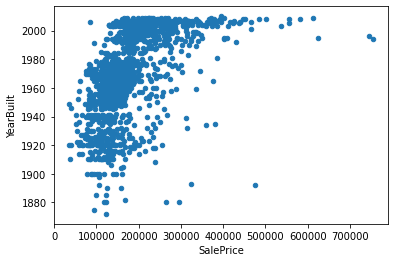

In [ ]:
# n7ebou na3rfou el 3ale9a bin Sale Price w les top_corr 
dataset.plot.scatter(x='SalePrice', y='YearBuilt')

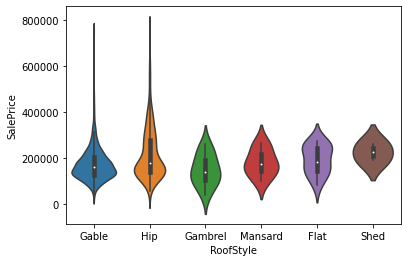

In [ ]:
sns.violinplot (x='RoofStyle',y='SalePrice' ,data=dataset)

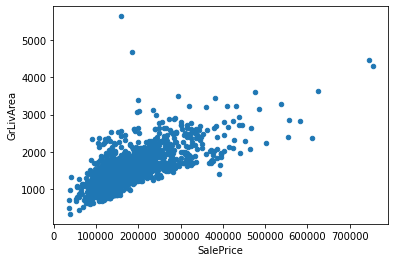

In [ ]:
dataset.plot.scatter(y='GrLivArea', x='SalePrice')

In [ ]:
dataset.shape

In [ ]:
features = dataset[['YearBuilt','Neighborhood','MasVnrArea','LotShape','LotArea','HouseStyle','Exterior1st','ExterQual','Condition1','BsmtUnfSF','Alley','Street','RoofStyle','OverallCond','GrLivArea']]

In [ ]:
# Il ya des colonnes de types non numerique (objet) 
# Il faut les convertir en numerqiue 

pandas.get_dummies(dataset.select_dtypes(include=['object','string']))

In [ ]:
features=dataset[['YearBuilt','OverallCond','GrLivArea']]
labels = dataset.SalePrice

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Modeling LogisticRegression
# lezimni se3a n'importi les models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# lezimni na3mel instance lil model kima fi orienté objet
log = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
tree = DecisionTreeClassifier()
#0.018 0.015
#0.017 0.019
#0.224 0.003
#0.981 0.014

In [ ]:
# Training
for model in [log, svm, knn, tree]:
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(round(train_acc,3), round(test_acc,3))

0.021 0.01
0.019 0.007
0.223 0.007
0.973 0.007


In [ ]:
model.predict(features)

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
predictions = model.predict(features)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions , labels)

458967224.91780823

In [ ]:
rmse

818591.5638338816

In [ ]:
labels.describe()

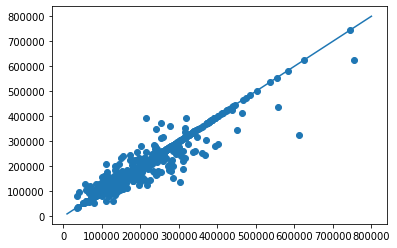

In [ ]:
plt.scatter(labels , predictions)
plt.plot([10000.,800000.], [10000.,800000.],'-')